In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
in this part load the data into a DataFrame, and will explore the structure of the data set

In [2]:
diamonds = pd.read_csv("diamonds.txt", sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


 we will determine the size of the dataset.


In [3]:
diamonds.shape

(53940, 10)

We will now inspect the distribution of the columns in diamonds

In [4]:
diamonds_description = diamonds.describe()
diamonds_description

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
we will use filtering and sorting techniques to display information for diamonds satisfying certain
criteria

In [5]:
result = diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False)
result.head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


 we will now view information about the 5 least expensive diamonds in the dataset

In [6]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=True)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


we will now view information about the 5 largest diamonds in the dataset with an
ideal cut

In [7]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Ideal'].sort_values(by='carat', ascending=False)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


we will now view information about the 5 largest diamonds in the dataset with an
fair cut.

In [8]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Part 3: Working with Categorical Variables
 we will be creating lists to specify the order for each of the three categorical variables

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']


we will now use these lists to communicate to Pandas the correct order for the
levels of the three categorical variables.

In [10]:
diamonds['clarity'] = pd.Categorical(diamonds.clarity, categories=clarity_levels, ordered=True)
diamonds['cut'] = pd.Categorical(diamonds.cut, categories=cut_levels, ordered=True)
diamonds['color'] = pd.Categorical(diamonds.color, categories=color_levels, ordered=True)

we will now create lists of named colors to serve as palettes to be used for
visualizations later in the notebook

In [11]:
clarity_pal = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan']
color_pal = ['yellow', 'lime', 'salmon', 'maroon', 'navy', 'olive', 'saddlebrown']
cut_pal = ['gold', 'magenta', 'indigo', 'darkred', 'turquoise']

## Part 4: Displaying Counts for Categorical Variables
we will start by counting the number of diamonds for each level of cut

In [12]:
cut_counts = diamonds['cut'].value_counts().sort_index()
cut_counts

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

we will now count the number of diamonds for each level of color

In [13]:
color_counts = diamonds['color'].value_counts().sort_index()
color_counts

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

we will now count the number of diamonds for each level of clarity

In [14]:
clarity_counts = diamonds['clarity'].value_counts().sort_index()
clarity_counts

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

## Part 5: Scatterplots of Price Against Carat
we  will explore the relationship between the price and carat attributes by generating scatter plots

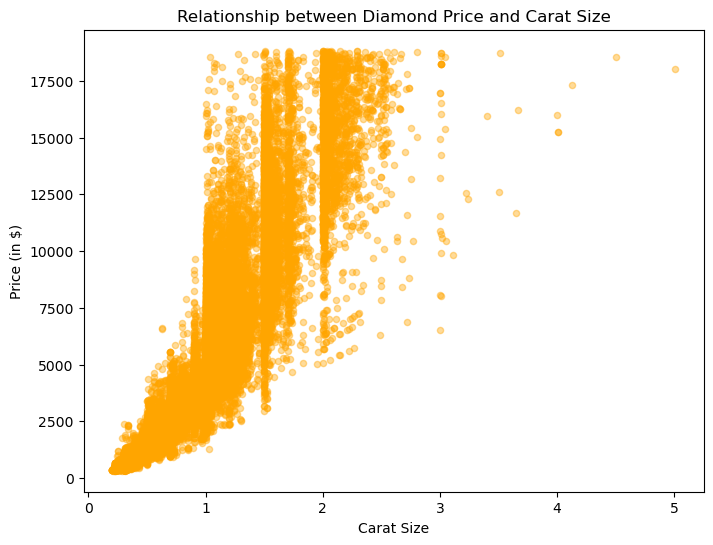

In [15]:
plt.figure(figsize=[8, 6])
plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color='orange', edgecolor=None)
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")
plt.title("Relationship between Diamond Price and Carat Size")
plt.show()

explaining that we will reproduce the plot from above, but will now color the points according to
their clarity

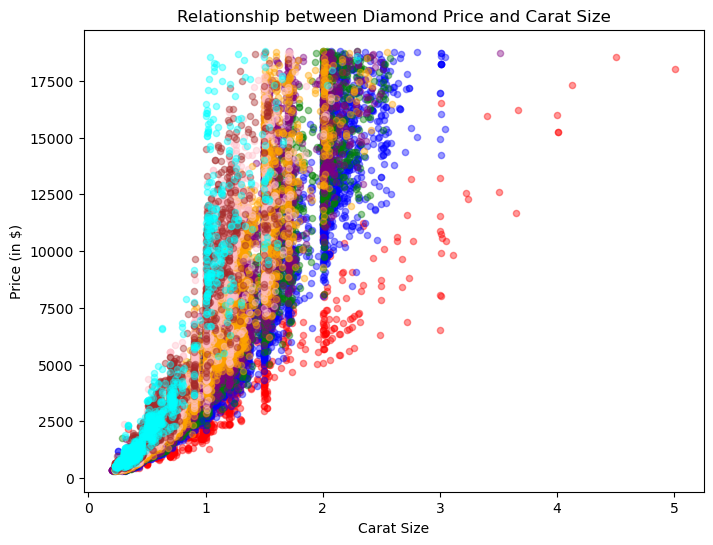

In [16]:
plt.figure(figsize=[8, 6])
for i, clarity_level in enumerate(clarity_levels):
    subset = diamonds[diamonds['clarity'] == clarity_level]
    plt.scatter(subset['carat'], subset['price'], s=20, alpha=0.4, label=clarity_level, color=clarity_pal[i], edgecolor=None)
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")
plt.title("Relationship between Diamond Price and Carat Size")
plt.show()

we will now separate the points for each of the eight clarity levels into its own
subplot

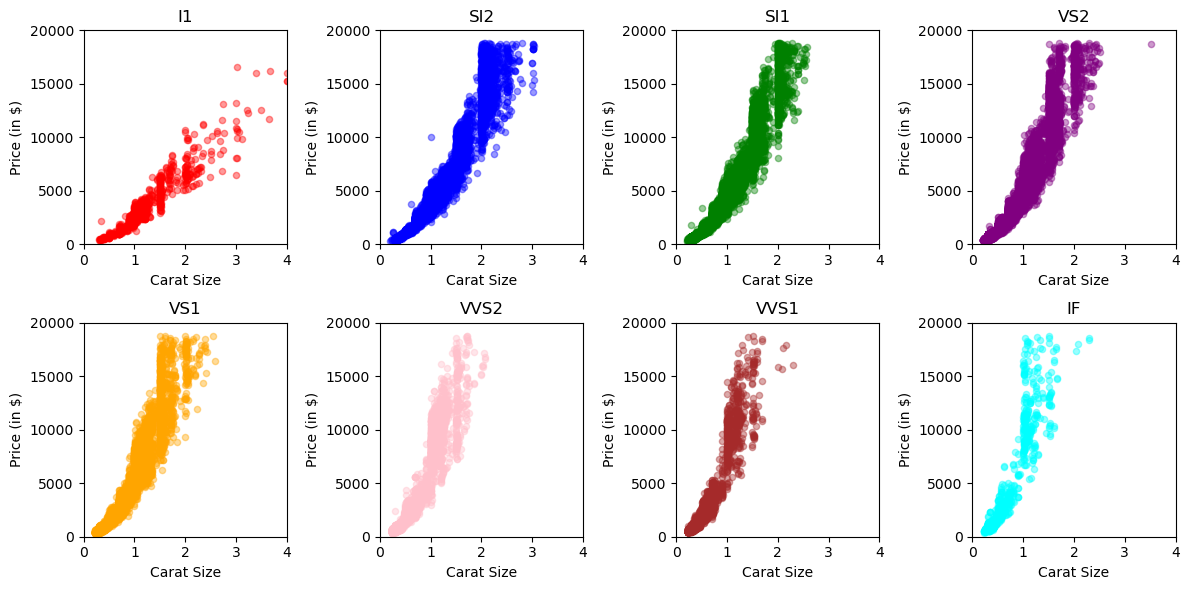

In [17]:
plt.figure(figsize=[12, 6])
for i, clarity_level in enumerate(clarity_levels):
    plt.subplot(2, 4, i + 1)  
    subset = diamonds[diamonds['clarity'] == clarity_level]
    plt.scatter(subset['carat'], subset['price'], s=20, alpha=0.4, color=clarity_pal[i], edgecolor=None)
    plt.xlabel("Carat Size")
    plt.ylabel("Price (in $)")
    plt.title(clarity_level)
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
we will start by adding two new columns to the diamonds in order to store the transformed variables

In [18]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

we will now use histograms to explore the distribution of the diamond prices, and
the log of the diamond prices

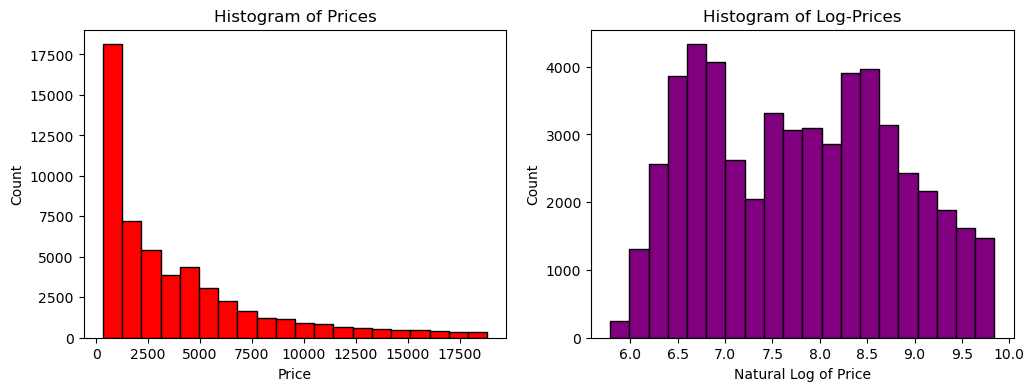

In [19]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['price'], bins=20, edgecolor='black', color='red')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Prices")
plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='purple')
plt.xlabel("Natural Log of Price")
plt.ylabel("Count")
plt.title("Histogram of Log-Prices")
plt.show()

we will now use histograms to explore the distribution of the carat sizes, and the
log of the carat sizes

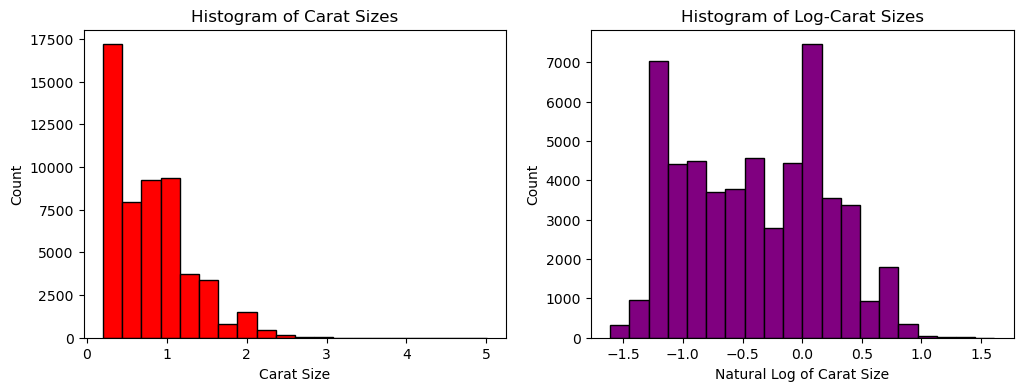

In [20]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['carat'], bins=20, edgecolor='black', color='red')
plt.xlabel("Carat Size")
plt.ylabel("Count")
plt.title("Histogram of Carat Sizes")
plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='purple')
plt.xlabel("Natural Log of Carat Size")
plt.ylabel("Count")
plt.title("Histogram of Log-Carat Sizes")
plt.show()

## Part 7: Scatterplot of Transformed Variables
we will create a scatterplot of ln_price against ln_carat, with points colored according to their
clarity

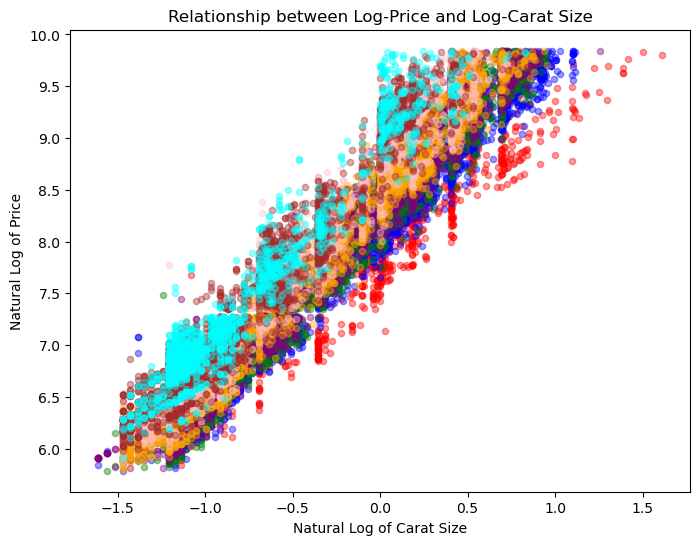

In [21]:
plt.figure(figsize=[8, 6])
for clarity_level, color in zip(clarity_levels, clarity_pal):
    subset = diamonds[diamonds['clarity'] == clarity_level]
    plt.scatter(subset['ln_carat'], subset['ln_price'], s=20, alpha=0.4, label=clarity_level, color=color, edgecolor=None)
plt.xlabel("Natural Log of Carat Size")
plt.ylabel("Natural Log of Price")
plt.title("Relationship between Log-Price and Log-Carat Size")
plt.show()

## Part 8: Grouping by Cut
we will create a grouped DataFrame displaying the mean price and carat size for each cut level.

In [22]:
gb_cut = diamonds[['cut', 'price', 'carat']].groupby('cut').mean()
gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


we will now use bar charts to graphically display the information from the
DataFrame above.


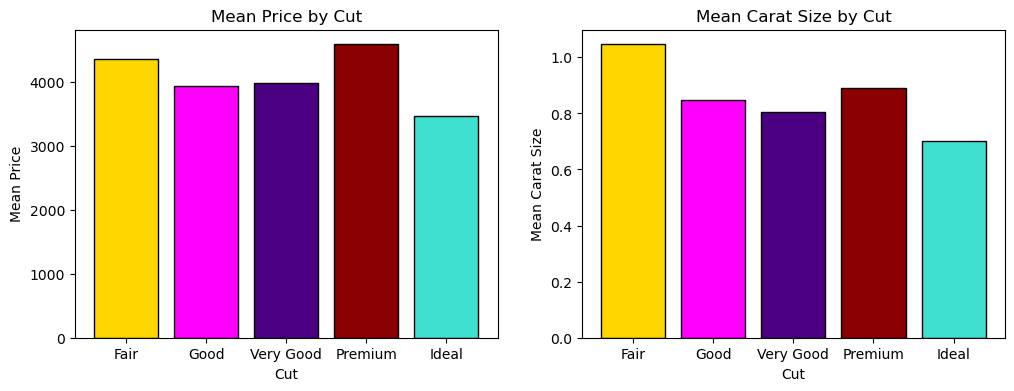

In [23]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut['price'], color=cut_pal, edgecolor='black')
plt.xlabel("Cut")
plt.ylabel("Mean Price")
plt.title("Mean Price by Cut")
plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut['carat'], color=cut_pal, edgecolor='black')
plt.xlabel("Cut")
plt.ylabel("Mean Carat Size")
plt.title("Mean Carat Size by Cut")
plt.show()

## Part 9: Grouping by Color
we will create a grouped DataFrame displaying the mean price and carat size for each color level.

In [24]:
gb_color = diamonds[['color', 'price', 'carat']].groupby('color').mean()
gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


we will now use bar charts to graphically display the information from the
DataFrame above.

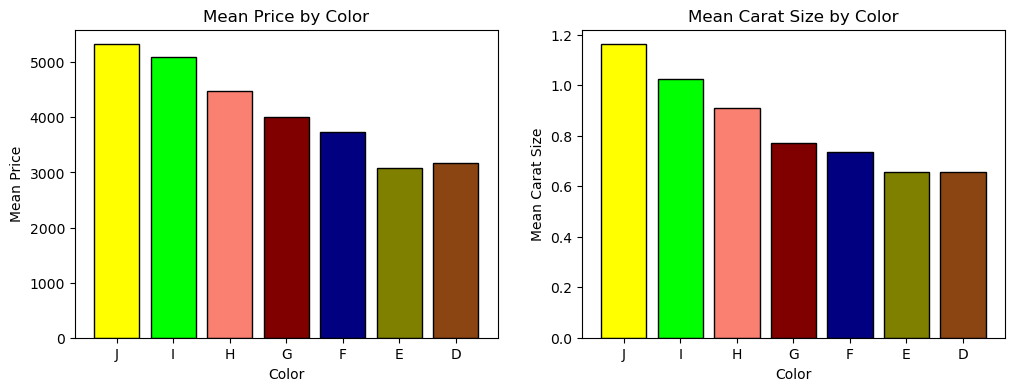

In [25]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_color.index, gb_color['price'], color=color_pal, edgecolor='black')
plt.xlabel("Color")
plt.ylabel("Mean Price")
plt.title("Mean Price by Color")
plt.subplot(1, 2, 2)
plt.bar(gb_color.index, gb_color['carat'], color=color_pal, edgecolor='black')
plt.xlabel("Color")
plt.ylabel("Mean Carat Size")
plt.title("Mean Carat Size by Color")
plt.show()

## Part 10: Grouping by Clarity
we will create a grouped DataFrame displaying the mean price and carat size for each clarity level

In [26]:
gb_clarity = diamonds[['clarity', 'price', 'carat']].groupby('clarity').mean()
gb_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


we will now use bar charts to graphically display the information from the
DataFrame above.


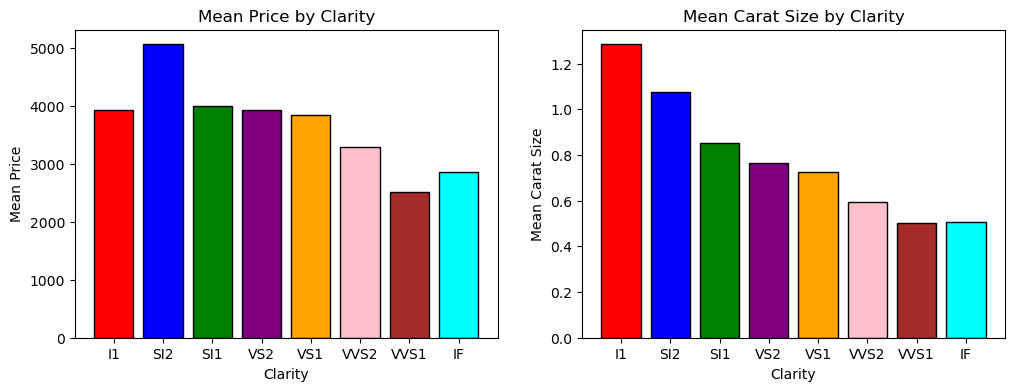

In [27]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity['price'], color=clarity_pal, edgecolor='black')
plt.xlabel("Clarity")
plt.ylabel("Mean Price")
plt.title("Mean Price by Clarity")
plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity['carat'], color=clarity_pal, edgecolor='black')
plt.xlabel("Clarity")
plt.ylabel("Mean Carat Size")
plt.title("Mean Carat Size by Clarity")
plt.show()